In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-seat-in-car-sales/sample_submission.csv
/kaggle/input/child-seat-in-car-sales/train.csv
/kaggle/input/child-seat-in-car-sales/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/child-seat-in-car-sales/train.csv')
df

,ID,Sales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,114,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes
1,72,6.50,148,51,16,148,150,Medium,58,17,No,Yes
2,78,7.70,118,71,12,44,89,Medium,67,18,No,Yes
3,209,7.78,86,54,0,497,64,Bad,33,12,Yes,No
4,293,11.82,113,66,16,322,74,Good,76,15,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
344,219,9.70,138,61,12,156,120,Medium,25,14,Yes,Yes
345,395,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
346,326,11.70,144,69,11,131,104,Medium,47,11,Yes,Yes
347,20,8.73,129,76,16,58,121,Medium,69,12,Yes,Yes


In [3]:
df1 = pd.read_csv('/kaggle/input/child-seat-in-car-sales/test.csv')
df1

,ID,Sales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,316,6.39,131,21,8,220,171,Good,29,14,Yes,Yes
1,361,8.77,118,86,7,265,114,Good,52,15,No,Yes
2,155,6.89,129,69,10,289,110,Medium,50,16,No,Yes
3,42,7.96,157,53,0,403,124,Bad,58,16,Yes,No
4,119,7.57,112,88,2,243,99,Medium,62,11,Yes,Yes
5,37,8.89,122,76,0,270,100,Good,60,18,No,No
6,239,7.36,121,24,0,200,133,Good,73,13,Yes,No
7,290,8.75,143,77,25,448,156,Medium,43,17,Yes,Yes
8,202,5.94,138,83,0,139,134,Medium,54,18,Yes,No
9,82,7.52,116,72,0,237,128,Good,70,13,Yes,No


In [4]:
su = pd.read_csv('/kaggle/input/child-seat-in-car-sales/sample_submission.csv')
su

,ID,Category
0,101,1
1,2,1
2,35,1
3,47,1
4,205,1
5,62,1
6,327,1


In [5]:
df.loc[(df['Sales'] <= 10), "SalesClass"] = 2
df1.loc[(df1['Sales'] <= 10), "SalesClass"] = 2
df.loc[(df['Sales'] <= 5), "SalesClass"] = 1
df1.loc[(df1['Sales'] <= 5), "SalesClass"] = 1
df.loc[(df['Sales'] > 10), "SalesClass"] = 3
df1.loc[(df1['Sales'] > 10), "SalesClass"] = 3

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
LeLocation = LabelEncoder()
LeUrban = LabelEncoder()
LeUS = LabelEncoder()

In [8]:
df['location'] = LeLocation.fit_transform(df['Location'])
df['urban'] = LeLocation.fit_transform(df['Urban'])
df['Us'] = LeLocation.fit_transform(df['US'])

In [9]:
df1['location'] = LeLocation.fit_transform(df1['Location'])
df1['urban'] = LeLocation.fit_transform(df1['Urban'])
df1['Us'] = LeLocation.fit_transform(df1['US'])

In [10]:
Train = df.drop(['Sales','Location','Urban','US'],axis = 'columns')
Test = df1.drop(['Sales','Location','Urban','US'],axis = 'columns')

In [11]:
Train

,ID,CompetitorPrice,Income,Advertising,Population,Price,Age,Education,SalesClass,location,urban,Us
0,114,131,29,11,335,127,33,12,2.0,0,1,1
1,72,148,51,16,148,150,58,17,2.0,2,0,1
2,78,118,71,12,44,89,67,18,2.0,2,0,1
3,209,86,54,0,497,64,33,12,2.0,0,1,0
4,293,113,66,16,322,74,76,15,3.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
344,219,138,61,12,156,120,25,14,2.0,2,1,1
345,395,130,58,19,366,139,33,16,2.0,0,1,1
346,326,144,69,11,131,104,47,11,3.0,2,1,1
347,20,129,76,16,58,121,69,12,2.0,2,1,1


In [12]:
X_train = Train.to_numpy()
X_train = X_train[:,:]
X_test = Test.to_numpy()
X_test = X_test[:,:]
y_train = Train.to_numpy()
y_train = y_train[:,8:9]

In [13]:
from sklearn import tree

In [14]:
clf = tree.DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
clf.score(X_train,y_train)

1.0

In [17]:
y_pred = clf.predict(X_test)

[Text(200.88000000000002, 181.2, 'X[8] <= 2.5\ngini = 0.544\nsamples = 349\nvalue = [66, 216, 67]'),
 Text(133.92000000000002, 108.72, 'X[8] <= 1.5\ngini = 0.359\nsamples = 282\nvalue = [66, 216, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 66\nvalue = [66, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 216\nvalue = [0, 216, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 67\nvalue = [0, 0, 67]')]

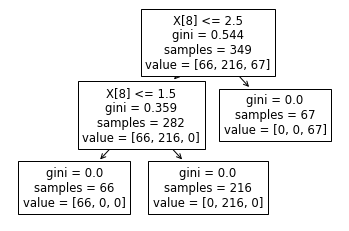

In [18]:
tree.plot_tree(clf)

[Text(1674.0, 1359.0, 'X[8] <= 2.5\ngini = 0.544\nsamples = 349\nvalue = [66, 216, 67]'),
 Text(1116.0, 815.3999999999999, 'X[8] <= 1.5\ngini = 0.359\nsamples = 282\nvalue = [66, 216, 0]'),
 Text(558.0, 271.79999999999995, 'gini = 0.0\nsamples = 66\nvalue = [66, 0, 0]'),
 Text(1674.0, 271.79999999999995, 'gini = 0.0\nsamples = 216\nvalue = [0, 216, 0]'),
 Text(2232.0, 815.3999999999999, 'gini = 0.0\nsamples = 67\nvalue = [0, 0, 67]')]

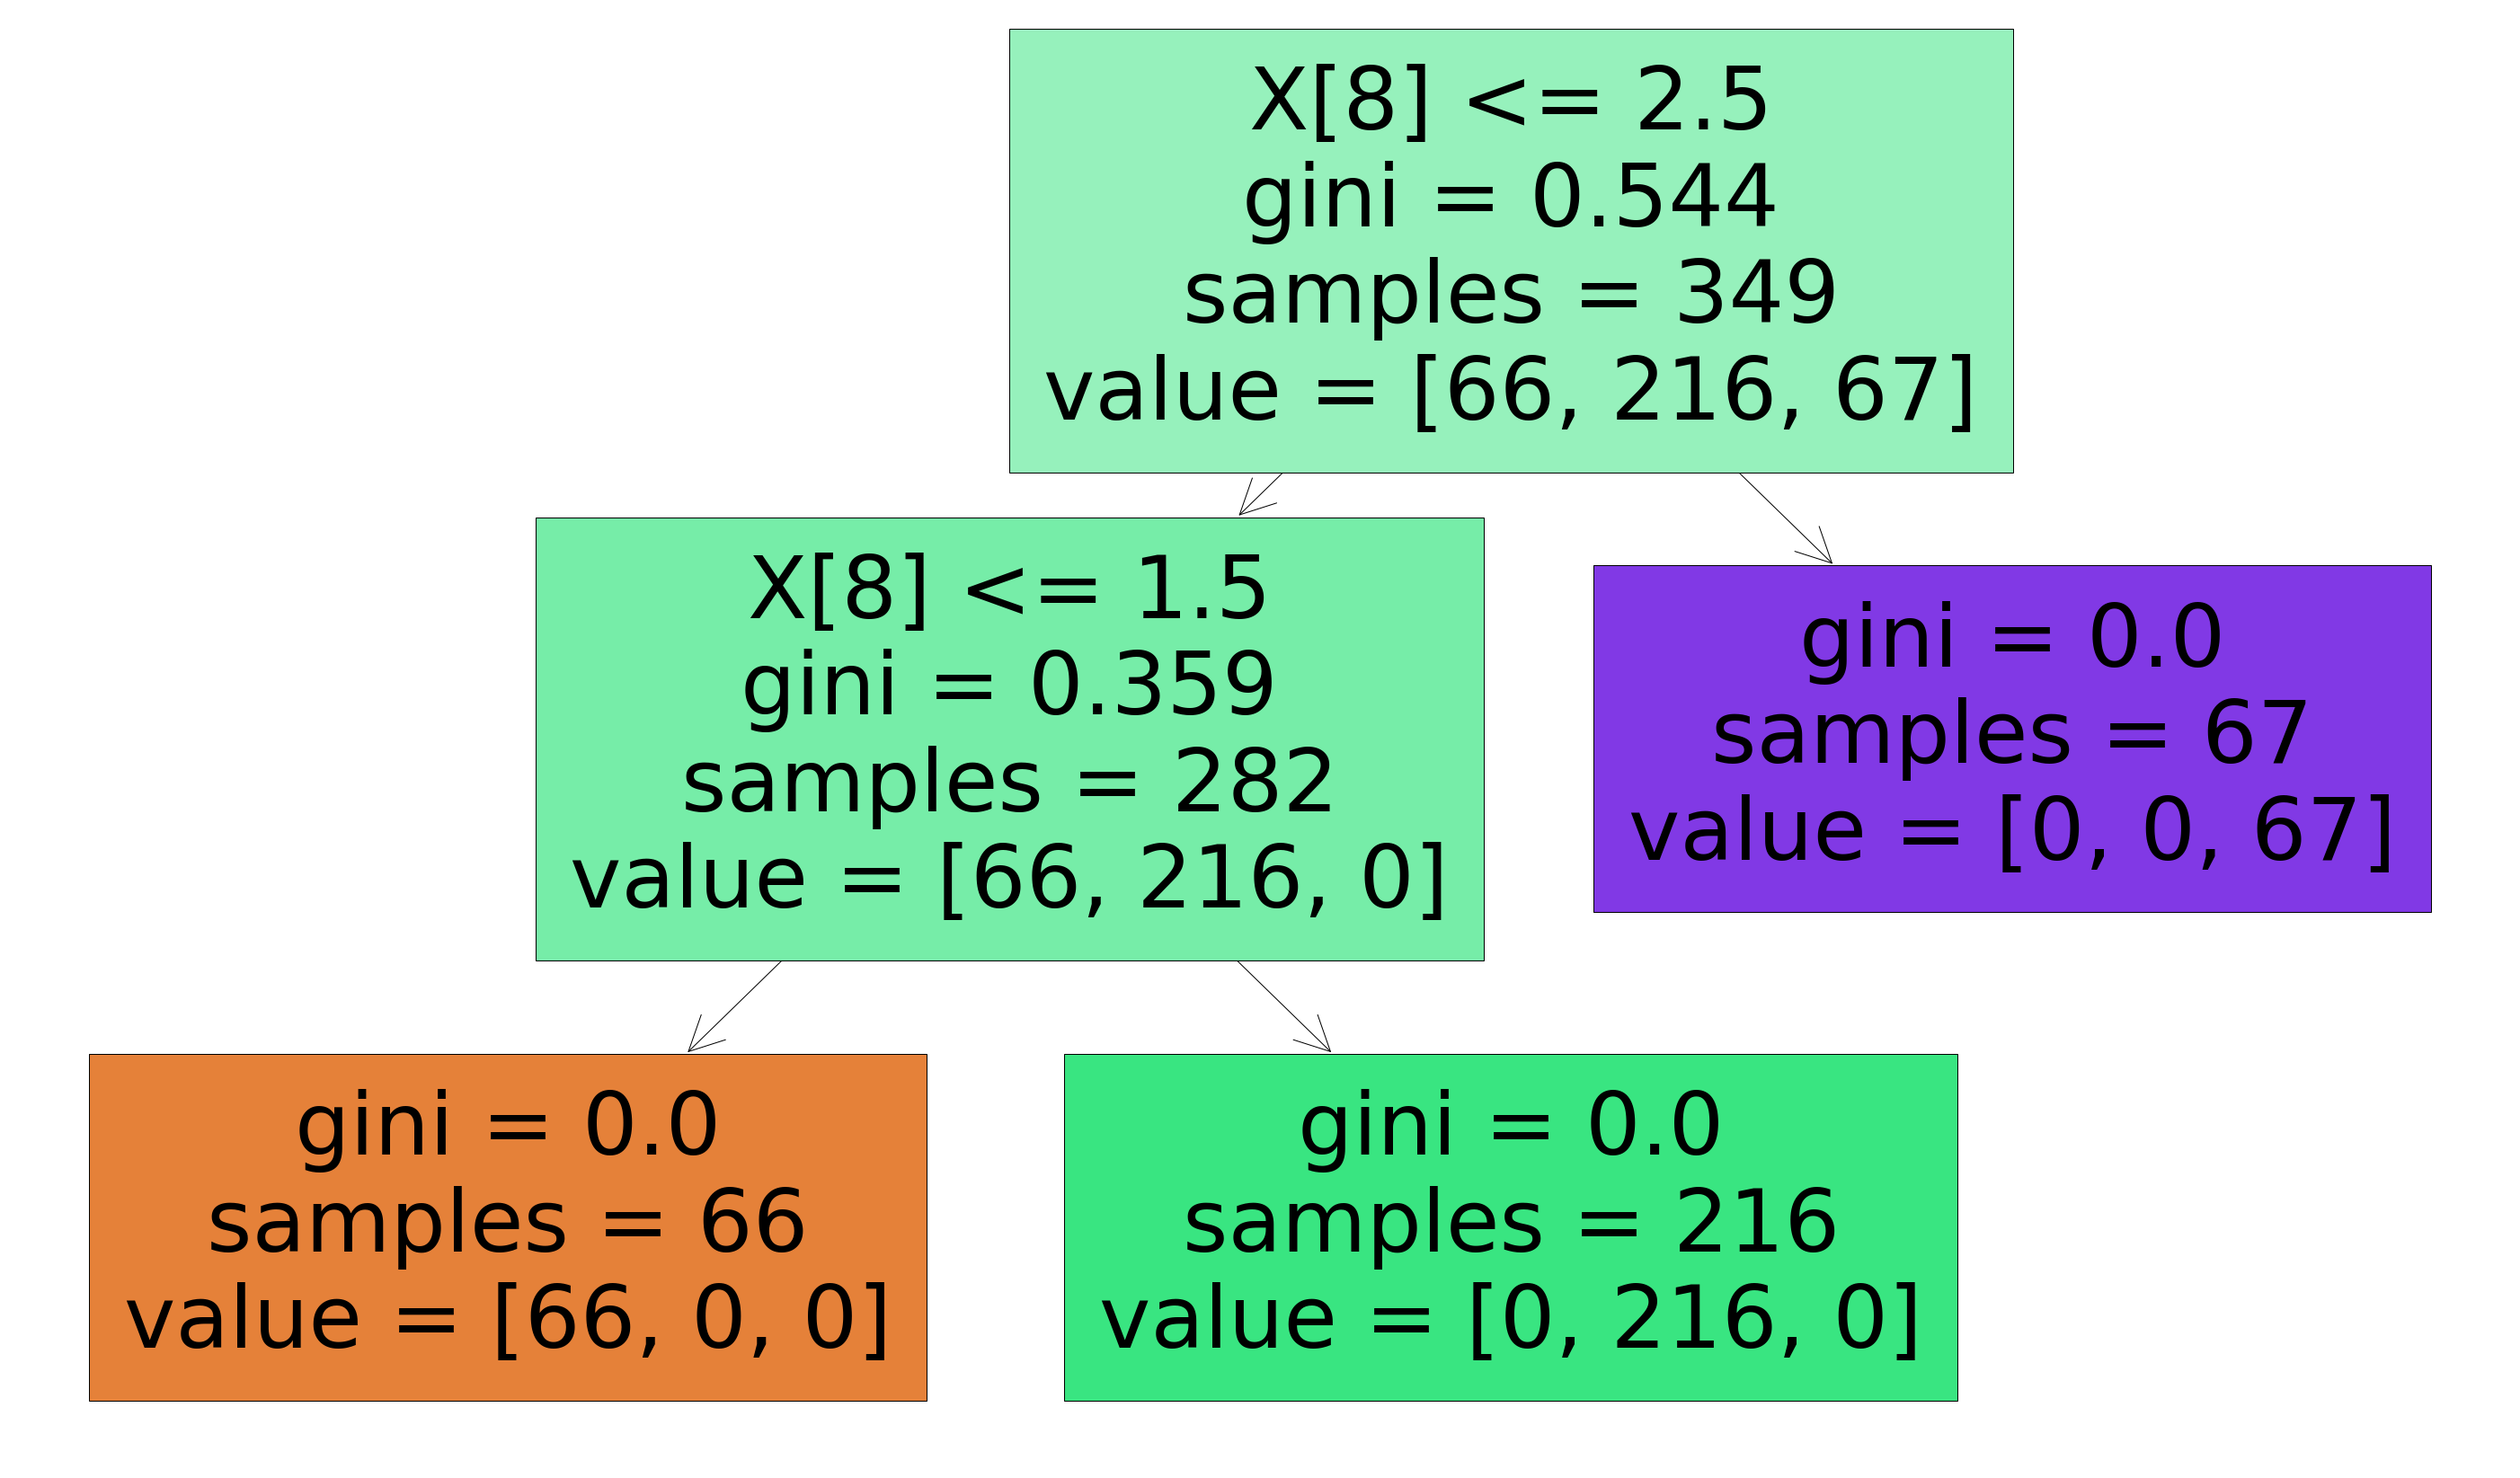

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (50,30))
tree.plot_tree(clf,filled = True)

In [20]:
Predection = pd.DataFrame({'ID': df1['ID'], 'Category': np.array(y_pred)})

In [21]:
Predection.to_csv('CarSales.csv')